<img src='logo_DH.png' align='left' width=35%/>

## Grupo 2
### Integrantes:
* Alejandro Fracchia  
* Eugenia Perotti 
* Gastón Ortiz
* Matias Formica

#### Sección 1:
* [Importacion de librerias y primer analisis](#importacion)
* [Detección y eliminación de duplicados](#duplicados)

#### Sección 2:
* [Arreglo de columnas referidas a la localización](#geonamesid)
    * [Campos de Coordenadas: lat, lon y lat-lon](#latlon)
    * [Columnas descriptivas de ubicación](#ubicacion)
    * [Valores faltantes](#regexlat)
* [Arreglo de columnas referidas a price](#price)
    * [Expresiones regulares para precios en dolares](#regex)
    * [Expresiones regulares para precios en pesos](#pesos)
* [Arreglo de columna Rooms](#ambientes)
* [Arreglo de columna Floor](#floor)
* [Arreglo de columnas referidas a los metros cuadrados](#m2)
* [Creación de columna Pileta](#pileta)
* [Creación de la columna Cochera](#cochera)
* [Creación de las amenities](#amenities)

#### Sección 3:
* [Matriz de correlación](#matriz)
* [Graficos](#graficos)
    * [Variables Numericas](#numericas)
    * [Variables Categoricas](#categoricas)

<a id="importacion"></a>
## Importacion de librería y primer análisis del data_original set.

In [115]:
# importo librerias que voy a usar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
import re

In [116]:
# leo el data_original set
data_original = pd.read_csv("Data/properati.csv")

In [117]:
# veo el tamaño del data_original set
data_original.shape

(121220, 26)

In [118]:
# veo porcentaje de nulos y agrego nuevas columnas al data_original frame que voy a modificar mas tarde
data_original['price_dolar'] = data_original['price_aprox_usd'].copy()
data_original["ambientes"] = data_original['rooms'].copy()
data_original["price_m2_dolar"] = data_original['price_usd_per_m2'].copy()

In [119]:
def pct_nulos(df):
    nulos = df.isnull().sum() / df.shape[0]
    return nulos
nulos_original = pct_nulos(data_original)
nulos_original

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail          

In [120]:
data_original.keys()

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'price_dolar', 'ambientes', 'price_m2_dolar'],
      dtype='object')

In [121]:
# Algunas medidas de disperción de los datos
data_original[['price', 'price_aprox_local_currency','price_aprox_usd', 'surface_total_in_m2',\
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',\
       'rooms', 'expenses']].describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


<a id="duplicados"></a>
## Detección y eliminación de duplicados.
Tuvimos varios criterios para eliminar filas duplicadas, para no borrar ninguna que no lo sea.
Las columnas que elegimos para que una fila se considere duplicado son "property_type","place_name","geonames_id","lat-lon","price","surface_total_in_m2","surface_covered_in_m2","description".

In [122]:
# vemos cuantos duplicados voy a borrar 
desc_dupl = data_original.duplicated(subset=["property_type","place_name","geonames_id","lat-lon","price","surface_total_in_m2","surface_covered_in_m2","description"])
print("cantidad de duplicados a borrar", desc_dupl.sum())
sindesc_dupl = data_original.duplicated(subset=["property_type","place_name","geonames_id","lat-lon","price","surface_total_in_m2","surface_covered_in_m2"])
print("si saco la descripcion, podria borrar",sindesc_dupl.sum())

cantidad de duplicados a borrar 6069
si saco la descripcion, podria borrar 13873


In [123]:
# borramos los duplicados, que en total son 6069.
data_original.dropna(subset=["description"],inplace=True)
data = data_original.drop_duplicates(subset=["property_type","place_name","geonames_id","lat-lon","price","surface_total_in_m2","surface_covered_in_m2","description"],keep="first")
pct_nulos1 = data.isnull().sum() / data.shape[0]
data.shape,data_original.shape

((115149, 29), (121218, 29))

<a id="geonamesid"></a>
## Arreglo de columnas referidas a la geolocalización.

Hay varios campos que intervienen en la **geolocalización**. Los más útiles son **lan** y **lon** porque nos dan la ubicación exacta de la propiedad. El problema es que tienen un porcentaje alto de nulos, por lo que el objetivo va a ser tratar de inducir estos valores. 

Los campos que vamos a evaluar para definir una estrategia de imputación, serán: 
* **lat-lon:** concatenación de latitud y longitud.
* **lat:** latitud.
* **lon:** longitud.
* **place_name:** localidad o barrio.
* **place_with_parent_names:** concatenación de ubicaciones.
* **country_name:** país.
* **state_name:** provincia o partido.
* **geonames_id:** identificador de ubicación.

### Campos de Coordenadas: lat, lon y lat-lon.
Hay tres campos de coordenadas: **lat, lon** y **lat-lon**. 

Revisando qué información tienen:

In [124]:
data[['lat','lon','lat-lon']].head(3)

,lat,lon,lat-lon
0,-34.661824,-58.508839,"-34.6618237,-58.5088387"
1,-34.903883,-57.964330,"-34.9038831,-57.9643295"
2,-34.652262,-58.522982,"-34.6522615,-58.5229825"


In [125]:
# Cantidad de nulos
data[['lat','lon','lat-lon']].isnull().sum()

lat        47745
lon        47745
lat-lon    47745
dtype: int64

In [126]:
# Porcentaje de nulos
round(data[['lat','lon','lat-lon']].isnull().sum() / data.shape[0],2)

lat        0.41
lon        0.41
lat-lon    0.41
dtype: float64

A simple vista, pareciera ser que **lat-lon** tiene la misma información que **lat** y **lon**, con un decimal adicional.

Para comprobar si esto efectivamente es así, separaremos **lat-lon** en dos columnas y luego compararemos a cada una contra **lat** y **lon**, respectivamente.

In [127]:
# 1. Separar lat-lon en lat y lon.
lati = data['lat-lon'].apply(lambda x: x if x is np.NaN else float(x.split(",")[0]))
longi = data['lat-lon'].apply(lambda x: x if x is np.NaN else float(x.split(",")[1]))

# 2. Comparar contra lan para ver si son iguales.
lati_notnulls = lati.notnull()
lat_notnulls = data['lat'].notnull()
print('Cantidad no nulos lati:', lati_notnulls.sum())
print('Cantidad no nulos lat:', lat_notnulls.sum())
mask_noiguales_latitud = lati_notnulls != lat_notnulls

data.loc[mask_noiguales_latitud, :]

# 3. Comparar contra lon para ver si son iguales.
longi_notnulls = longi.notnull()
lon_notnulls = data['lon'].notnull()
print('Cantidad no nulos longi:', longi_notnulls.sum())
print('Cantidad no nulos lon:', lon_notnulls.sum())
mask_noiguales_longitud = longi_notnulls != lon_notnulls
data.loc[mask_noiguales_longitud, :]

# 4. Confirmación visual.
data['lat-lon_longitud'] = longi
data['lat-lon_latitud'] = lati

data[['lat-lon', 'lat', 'lon' , 'lat-lon_latitud','lat-lon_longitud']].head(3)

Cantidad no nulos lati: 67404
Cantidad no nulos lat: 67404
Cantidad no nulos longi: 67404
Cantidad no nulos lon: 67404


C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,lat-lon,lat,lon,lat-lon_latitud,lat-lon_longitud
0,"-34.6618237,-58.5088387",-34.661824,-58.508839,-34.661824,-58.508839
1,"-34.9038831,-57.9643295",-34.903883,-57.964330,-34.903883,-57.964329
2,"-34.6522615,-58.5229825",-34.652262,-58.522982,-34.652262,-58.522982


Podemos concluir que el campo **lat-lon** tiene la misma información que **lat** y **lon** separadamente. 

Por una cuestión de practicidad es preferible tener estos campos por separado, y por lo tanto se puede prescindir de esta columna.

<p style="color:red; font-size:20px;"> COMENTARIOS</p>


Sobre la celda de aquí arriba. 

* En lugar de hacer un apply y evaluar con una función lambda si cada elemento si es nulo, filtrar con una máscara los elementos nulos y luego hacer un apply sobre todos los elementos. Ejemplo:





In [128]:
data_ah=data.copy();

mask=data_ah['lat-lon'].notnull();

latlon=data_ah.loc[mask,'lat-lon'].apply(lambda x: x.split(","))
lati=latlon.apply(lambda x: np.float(x[0]))
longi=latlon.apply(lambda x: np.float(x[1]))

print('Hay diferencias entre lat y lat-lon? ', ( np.round(data_ah.loc[mask,'lat'],4)!=np.round(lati,4) ).any() )
print('Hay diferencias entre lon y lat-lon? ', ( np.round(data_ah.loc[mask,'lon'],4)!=np.round(longi,4) ).any() )



Hay diferencias entre lat y lat-lon?  False
Hay diferencias entre lon y lat-lon?  False


<a id="ubicacion"></a>
### Columnas descriptivas de ubicación: place_name, place_with_parent_names, country_name y state_name.

In [129]:
data[['place_name', 'place_with_parent_names', 'country_name', 'state_name']].head(3)

,place_name,place_with_parent_names,country_name,state_name
0,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal
1,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur
2,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal


In [130]:
data[['place_name', 'place_with_parent_names', 'country_name', 'state_name']].isnull().sum()

place_name                 23
place_with_parent_names     0
country_name                0
state_name                  0
dtype: int64

En estas columnas aparentemente no hay mayores problemas de nulos. Sólo **place_name** tiene 23 elementos a los que les falta valor. 

Revisemos un poco más estos datos.

In [131]:
mask_place_name_nulos = data.place_name.isnull()
mask_place_name_no_nulos = data.place_name.notnull()
print('Registros no nulos:', data.loc[mask_place_name_no_nulos,'place_name'].shape[0])
print('Registros nulos:', data.loc[mask_place_name_nulos,'place_name'].shape[0])
data.loc[mask_place_name_nulos].head()

Registros no nulos: 115126
Registros nulos: 23


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,price_dolar,ambientes,price_m2_dolar,lat-lon_longitud,lat-lon_latitud
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,-58.638098,650000.0,USD,11468925.0,650000.0,240.0,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_tigre_suite_jardin_lavadero_piscina_toilette_losa-radiante_pratto-propiedades_dog,"Espectacular casa moderna de una planta, con amplio jardín y entorno arbolado!Construída con mucho diseño por reconocido arquitecto.Desarrollada en una planta, con un amplio living comedor de doble altura.- Toilette. Cocina con mucho espacio de guardado, con muebles Johnson. Lavadero con amplio espacio de guardado.Dos dormitorios en suite, el principal con vista y acceso a la pileta. .Exterior: Escritorio o cuarto de huésped con baño completo (se usa tb como baño de pileta) y entrada independiente. Galería con un deck de 180 mts con pileta revestida con venecitas e iluminación.-Espectacular jardín con sistema de riego por aspersión.-Entrada para varios autos.Detalles: Aberturas de aluminio anodizado con DVH, calefacción por losa radiante.- Toldos en la galería. Dos AA de 12000 frig. cada uno y tres split en dormitorios",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxyiDsxXOm1AF3D8=/trim/198x0/smart/filters:strip_icc()/static.sumaprop.com/11122/547949/files/5343437.jpg,650000.0,NaN,2708.333333,-58.638098,-34.400897
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,-58.638067,535000.0,USD,9439807.5,535000.0,NaN,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_tigre_suite_jardin_parrilla_piscina_toilette_dependencias_garage_aire-acondicionado_re-max-power,"Corredor Responsable: SABRINA COCCONI - CSI 6258Contacto: Ximena Lima - MLS ID # 420801007-15EN EL MARAVILLOSO BARRIO ""Santa María de Tigre"" CON ABUNDANTE ARBOLEDA Y VEGETACIÓN NOS ENCONTRAMOS CON ÉSTA FANTÁSTICA CASA EN UN CUL-DE-SAC. ENTRADA CON ESTACIONAMIENTO PARA 3 AUTOS. INGRESAMOS A LA PROPIEDAD AL LIVING, PLANTA EN LA QUE LA CASA CUENTA CON UN ESCRITORIO QUE LO PODEMOS TRANSFORMAR EN CINE, UN COMEDOR, TOILETE Y PUERTA BLINDEX ESMERILADA QUE NOS LLEVA A LA COCINA. ÉSTA PLANTA TIENE PISOS DE BALDOSONES DE CEMENTO DE 80 X 80 CM. MISMO PISO DE LOS INTERIORES SE EXTIENDEN A LA GALERÍA DANDO MAYOR AMPLITUD VISUAL. COCINA CON MUEBLES DE PISO A TECHO CON PUERTAS CORREDIZAS. ISLA CENTRAL CON ANAFES Y HORNO SMEG 90 CM. ITALIANA. PLANTA ALTA CON UN DORMITORIO CON BAÑO EN SUITE CON CUARTO DE VESTIR. MÁS DOS DORMITORIOS CON OTRO BAÑO COMPLETO. AMBOS BAÑOS CON PISOS Y PAREDES REVESTIDOS DE MÁRMOL DE CARRARA. AIRE ACONDICIONADO FRÍO/ CALOR EN TODOS LOS AMBIENTES. TIRO BALANCEADO EN TODOS LOS AMBIENTES. OPCIÓN DE CALEFACCIÓN POR CHIMENÉA DE 2 M2 EN EL LIVING. ABERTURAS DE GRANDES PAÑOS DE 2,60 X 2,80 M2 CON VIDRIOS DE SEGURIDAD TONALIZADOS. GALERÍA DE 150 M2 CON PARRILLA Y BACHA DE LAVADO. JARDÍN DE 900 M2 CON RIEGO AUTOMATIZADO. PILETA DE 5 X 12 M2 Y PERGOLA. CERCO PARQUISADO Y FRONDOSA ARBOLEDA. ESPACIO CUBIERTO DE TENDIDO DE ROPA. DEPENDENCIA DE SERVICIO CON ENTRADA INDEPENDIENTE.",VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO CERRADO,https://thumbs4.properati.com/1/FABpKIJMaoAO3t7gZWdx4OUS4i0=/trim/198x0/smart/filters:strip_icc()/remax.com.ar/UserImages/42/L_fe8fc2df044e4a48976dd61583754ff6_iList.jpg,535000.0,5.0,NaN,-58.638067,-34.400704
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.62626133

Al evaluar los datos se ve que ese dato está faltando y no es posible deducirlo. Como son sólo 23 registros, podríamos eliminarlos de la serie.

Nos fijamos cómo está el resto de los campos cuando estos valores son nulos, para estar seguros de no estar tirando información valiosa:

In [132]:
data.loc[mask_place_name_nulos, ['price','price_aprox_local_currency','price_aprox_usd','price_usd_per_m2','price_per_m2']]
# Ver si se puede deducir place_name con la descripcion

,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
6489,650000.0,11468925.0,650000.0,2708.333333,2708.333333
10201,535000.0,9439807.5,535000.0,NaN,1783.333333
11451,550000.0,9704475.0,550000.0,253.456221,2037.037037
14839,480000.0,8469360.0,480000.0,2000.000000,2400.000000
18622,1297000.0,22884916.5,1297000.0,3814.705882,3814.705882
21922,440000.0,7763580.0,440000.0,NaN,2000.000000
23664,480000.0,8469360.0,480000.0,1632.653061,1632.653061
24722,530000.0,9351585.0,530000.0,1677.215190,1962.962963
38856,1350000.0,23820075.0,1350000.0,NaN,2454.545455
45970,95000.0,1676227.5,95000.0,1727.272727,3518.518519


Como las columnas de precio tienen información, decidimos que es mejor no eliminarlos.

Al revisar los datos que contiene **place_with_parent_names**, podemos ver que tiene datos que las otras tres columnas juntas no poseen.

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
Bien, por otro lado tal vez la información de la ubicación esté en el campo de descripción, o sea deducible de las coordenadas lat-lon si estuvieran.
</p>

In [133]:
data_original.place_with_parent_names.head(10)

0                            |Argentina|Capital Federal|Mataderos|
1                      |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2                            |Argentina|Capital Federal|Mataderos|
3                              |Argentina|Capital Federal|Liniers|
4    |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|
5                              |Argentina|Entre Ríos|Gualeguaychú|
6         |Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|Munro|
7                             |Argentina|Capital Federal|Belgrano|
8                             |Argentina|Capital Federal|Belgrano|
9                                     |Argentina|Santa Fe|Rosario|
Name: place_with_parent_names, dtype: object

Vamos a guardar estos datos en columnas separadas para futuros análisis.

In [134]:
serie_place_with_parent_names = data.place_with_parent_names

def limpiar_serie(serie):
    parents_name_lista = []
    for i in serie:
        parent_name = i.split("|")

        #se elimina el primer elemento si está vacío
        if (parent_name[0] != ''):
            print("Elemento encontrado:", parent_name[0])
        else:
            del parent_name[0]

        #se elimina el último elemento si está vacío    
        if (parent_name[-1] != ''):
            print("Elemento encontrado:", parent_name[-1])
        else:
            del parent_name[-1]

        #Se imprime la lista limpia para chequear que no hayan quedado elementos vacíos
        #print(parent_name)
        parents_name_lista.append(parent_name)
        
    return parents_name_lista

# Con la función definida obtenemos una lista con los elementos sin blancos
parents_name_list = limpiar_serie(serie_place_with_parent_names)

In [135]:
#se crea una cantidad de campos en base al valor máximo de len() 
#se recorren los elementos y, si no están nulos, se los va agregando a los campos 
longitud_maxima = 0

for pn in parents_name_list:
    if (len(pn) >= longitud_maxima):
        longitud_maxima = len(pn)
         
print("La cantidad máxima de elementos es:",longitud_maxima)

La cantidad máxima de elementos es: 5


In [136]:
# Compruebo si la primera posicion contiene al pais
serie_parents_name = pd.Series(parents_name_list)
pais_argentina = serie_parents_name.apply(lambda x: True if x[0] == 'Argentina' else False)
pais_argentina.value_counts()

True    115149
dtype: int64

In [137]:
# Compruebo que la posicion 1 contenga las pronvicias
provincia = serie_parents_name.apply(lambda x: x[1])
provincia.value_counts()

Capital Federal                 30475
Bs.As. G.B.A. Zona Norte        24538
Bs.As. G.B.A. Zona Sur          13493
Córdoba                         11455
Buenos Aires Costa Atlántica     9874
Santa Fe                         8960
Bs.As. G.B.A. Zona Oeste         8941
Buenos Aires Interior            2246
Río Negro                         789
Mendoza                           656
Tucumán                           631
Neuquén                           585
Corrientes                        572
Misiones                          404
Entre Ríos                        356
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Formosa                            32
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

La idea era crear las columnas nuevas necesarias con los valores nuevos que aparecen en la columna **place_with_parent_names** y que no estan en las columnas **place_name, country_name y state_name**. No se termino de completar por falta de tiempo. Se deja para un futuro analisis en el siguiente modulo.

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
En lugar de hacer un loop que recorra los elementos de una serie, conviene usar el método apply.
Les dejo unas pistas para achicar el código:
</p>

In [138]:
mask=data_ah['place_with_parent_names'].notnull();
def split_places(x):
    if x[0]=='|':
        x=x[1:]
    if x[-1]=='|':
        x=x[:-1];
    return x.split('|')
serie_places=data_ah.loc[mask,'place_with_parent_names'].apply(split_places);
places_df=serie_places.apply(pd.Series); # Este método es muy ineficiente, pero nos ahorra muchas lineas de código
places_df.head(3) # Recuerden que para generar este dataframe filtraron los valores nulos en place_with_parent_names. Por eso tiene menos filas que 'data'





,0,1,2,3,4
0,Argentina,Capital Federal,Mataderos,NaN,NaN
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,NaN,NaN
2,Argentina,Capital Federal,Mataderos,NaN,NaN


<a id="regexlat"></a>
### Se procede a completar los valores de las columnas **geonames_id** y **lat-lon** que contengan nulos 

Para completar los valores nulos, vamos a hacerlo por **place_name**. Agrupando este campo, cada place_name tiene un único **geonames_id**, por lo que si tenemos algun nulo en **geonames_id** que tenga place_name lo completaremos con el valor de **geonames_id** del que esté completo que tenga el mismo **place_name**.

Para esto, vamos a:
1. Agrupar los datos por **place_name**.
2. Dentro de esa agrupación, buscar el campo **geonames_id** y hacer un value_counts.
3. Despues se procedera a hacer un iterrows en el data_original frame para buscar los nulos de **geonames_id** que tengan **place_name**, y se procederá a completarlos.

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
Guarda! en la celda de acá abajo NO están guardando los cambios en el dataframe. En cada iteración modifican una variable nueva 'row' que es independiente del dataframe.
</br></br>
Por otro lado, nuevamente están iterando sobre todas las filas y chequeando en cada caso que no contenga un valor nulo. Es mucho más eficiente usar una máscara booleana para identificar los campos no nulos y luego trabajar sobre estos.
</br></br>
Usen el método apply en lugar de hacer un for loop.
</br></br>
Más allá del código, tiene sentido imputar geonames_id cuando ya tienen el place_name? Lo entendería más si fuera al revés: conseguir el place_name dado el geoname_id
</p>    
    

In [139]:
import time

t0=time.time()

print('Nulos antes:',data['geonames_id'].isnull().sum())

grupos_id = data.groupby("place_name")["geonames_id"].value_counts()
contador = 0
for index,row in data.iterrows():
    if np.isnan(row.geonames_id):
        try:
            data.geonames_id.loc[index] = grupos_id.loc[row.place_name].index[0]
        except:            
            contador +=1
contador

print('Nulos despues:',data['geonames_id'].isnull().sum())

t1=time.time()
# 
print('Tiempo:',t1-t0)


Nulos antes: 18003


C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Nulos despues: 13135
Tiempo: 10.98364782333374


<p style="color:red; font-size:15px;"> 
Aquí tienen una modificación posible:
</br></br>

In [140]:

print('Nulos antes:',data_ah['geonames_id'].isnull().sum());

# t0=time.time();

grupos_id = data_ah.groupby("place_name")["geonames_id"].value_counts();

mask1=np.logical_and(data_ah['geonames_id'].isnull() , data_ah['place_name'].notnull());

place_names_grupos_id=grupos_id.index.get_level_values('place_name');

mask2=data_ah['place_name'].apply(lambda x: x in place_names_grupos_id);

geonames_completables=np.logical_and(mask1,mask2);
mask1.sum(),mask2.sum()

data_ah['geonames_id']

def imputacion_geonames_id(x):        
    x['geonames_id']= grupos_id.loc[x['place_name']].index[0];
    return x

data_ah.loc[geonames_completables]=data_ah.loc[geonames_completables].apply(imputacion_geonames_id,axis=1);

print('Nulos despues:',data_ah['geonames_id'].isnull().sum())

t1=time.time();

print('Tiempo:',t1-t0)


Nulos antes: 18003
Nulos despues: 13135
Tiempo: 12.664157390594482


Comparamos cantidad de nulos que tenemos ahora vs. la que teníamos:

In [141]:
print("Cantidad de nulos antes:",data_original.geonames_id.isnull().sum())
print("Cantidad de nulos ahora:",data.geonames_id.isnull().sum())

Cantidad de nulos antes: 18717
Cantidad de nulos ahora: 13135


In [142]:
grupos_id_latlon = data.groupby(["place_name","geonames_id"])["lat-lon"].value_counts()
contador = 0
for index,row in data.iterrows():
    if row["lat-lon"] is np.NaN:
        try:
            row["lat-lon"] = grupos_id_latlon.loc[row.place_name].index[0][2]
            row["lat"] = grupos_id_latlon.loc[row.place_name].index[0][2].split(",")[0]
            row["lon"] = grupos_id_latlon.loc[row.place_name].index[0][2].split(",")[1]
            print()
            
        except:
            contador +=1
contador


47745

In [143]:
# Ya que las columnas lat-lon, lat, lon son iguales deberian tener la misma cantidad de nulos
# Veo cuantos nulos me quedaron
print("Cantidad de nulos antes:",data_original["lat-lon"].isnull().sum())
print("Cantidad de nulos ahora:",data["lat-lon"].isnull().sum())

Cantidad de nulos antes: 51549
Cantidad de nulos ahora: 47745


<a id="price"></a>
## Arreglo de columnas referidas al precio.

Hay varios campos que intervienen en el precio o que tienen información pertinente que podemos extraer:

* **price:** Precio original del aviso
* **currency:** Moneda original del aviso (ARS, USD)
* **price_aprox_local_currency:** Precio del aviso en moneda local (ARS)
* **price_aprox_usd:** Precio aproximado en USD
* **price_usd_per_m2:** Precio en USD/m²
* **price_per_m2:** Precio por m²
* **title:** Título del aviso
* **description:** Descripción del aviso


In [144]:
# Nos fijamos si los nulos son iguales en las columnas de precios. 
print("cantidad de filas en data:",data.shape[0])
print("Si ambos tiene la misma cantidad de nulos y estan en las misma filas, al comparar price.isnull() == price_aprox_usd.isnull() y sumar los true deberia dar la mismas filas que el data_original frame:",(data.price.isnull() == data.price_aprox_usd.isnull()).sum())
print("Si ambos tiene la misma cantidad de nulos y estan en las misma filas, al comparar price.isnull() == price_aprox_local_currency.isnull() y sumar los true deberia dar la mismas filas que el data_original frame:",(data.price.isnull() == data.price_aprox_local_currency.isnull()).sum())

cantidad de filas en data: 115149
Si ambos tiene la misma cantidad de nulos y estan en las misma filas, al comparar price.isnull() == price_aprox_usd.isnull() y sumar los true deberia dar la mismas filas que el data_original frame: 115149
Si ambos tiene la misma cantidad de nulos y estan en las misma filas, al comparar price.isnull() == price_aprox_local_currency.isnull() y sumar los true deberia dar la mismas filas que el data_original frame: 115149


In [145]:
# Me fijo si los nulos estan en la misma fila en ambas columnas, otra forma de lograr lo mismo que la celda anterior pero de forma diferente
set(data.price.isnull().index).issubset(set(data.price_aprox_usd.isnull().index))
set(data.price.isnull().index).issubset(set(data.price_aprox_local_currency.isnull().index))

True

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
En lugar de usar issubset usaría ==, subset devuelve True si los elementos del primer set están contenidos en el segundo, pero podría ser más grande el segundo.
</p>


LLegamos a la conclusión de que las columnas **price**, **price_aprox_local_currency** y **price_aprox_usd** tienen los mismos nulos en las mismas ubicaciones.

<a id="regex"></a>
### Uso de regex para completar los precios en dólares:
Se creo la columna **price_dolar** para tener esa columna como refencia del precio y no tener en cuenta las otras 3 del data_original frame.

In [146]:
print("Cantidad de nulos en la culumna price_aprox_usd:",data.price_aprox_usd.isnull().sum())

Cantidad de nulos en la culumna price_aprox_usd: 17269


In [147]:
# vemos si podemos completar algun price nulo por lo que sale en la descripcion
mascara = data.price_aprox_usd.isnull()
pd.set_option('display.max_colwidth', None)
price_nulo = data[mascara].copy()

In [148]:
# vemos el precio que hay en dolares en el titulo de la publicacion para completar nulos, con titulos relleno mas de 2000 precios
pat_tit1 = r'((([Uu][\$][Ss]?)|([Uu][Ss\$][Dd]{1}))+\s?(?P<precio>\d{2,3}[\.,]*\d{1,3}))'
regex_dol = re.compile(pat_tit1)
price_dolar_tit = price_nulo.title.apply(lambda x: regex_dol.search(str(x)))
price_dolar_tit.notnull().sum()
dolares_punto = price_dolar_tit[price_dolar_tit.notnull()].apply(lambda x: x.group('precio'))
dolares_limpios = dolares_punto.apply(lambda x: re.compile("\.").sub("",x))
dolares_limpios_final = dolares_punto.apply(lambda x: re.compile("\.").sub("",x))
data.loc[dolares_limpios.index,'price_dolar'] = dolares_limpios_final.astype(float).copy()

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
No hace falta que usen .copy() después de un apply, ya que por defecto apply devuelve una nueva serie (o dataframe).
En lugar de remover los puntos y comas, podrían no haberlos incluido en el grupo de captura
</p>



In [149]:
dolares_punto

1665      260.000
1666      115.000
1667      740.000
1669      740.000
1677      115.000
           ...   
50056      235000
50057      180000
61684     370.000
79472     300.000
103676     55.000
Name: title, Length: 2098, dtype: object

In [150]:
# logramos bajar casi 2 puntos porcentuales los nulos 
data['price_dolar'].isnull().sum()/ data.shape[0], data['price_aprox_usd'].isnull().sum() / data.shape[0]

(0.13175103561472526, 0.14997090725929013)

In [151]:
# quedaron 15171 nulos en la columna price_dolar
pd.set_option('display.max_rows',200)
data[data['price_dolar'].isnull()].title.sample(200)
data['price_dolar'].isnull().sum()

15171

<a id="ambientes"></a>
## Arreglo de columna "rooms".
Esta columna tiene un gran porcentaje de nulos. A simple vista podemos ver que es posible obtener información para imputarla tomando la columna **description**.<p>
Se crea la columna ambientes como refencia a rooms. Y se procede a completarle los valores nulos.

In [152]:
# se crea un data_original frame donde los valores de rooms sean nulos 
sin_amb = data[data.rooms.isnull()]['description']

In [153]:
x='AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).';
x.lower()

'ambientes tipo casa planta baja por pasillo, refaccionado a nuevo, patio grande, con lavadero, living comedor con cocina integrada, artefacto de cocina, alacena, baño completo, y dormitorio. todo en excelente estado, para habitar.no es apto credito aviso publicado por pixel inmobiliario (servicio de páginas web para inmobiliarias).'

Se prodece a crear varios patrones para encontrar la mayor cantidad posible de datos para rellenar los nulos

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
Tal vez valdría la pena llevar los campos de texto a lowercase, para no tener que buscar patrones en mayúscula y minúscula. Tambien pueden usar el flag re.IGNORECASE al compilar la regex.
Otra cosa que podrían hacer es remover acentos antes de aplicar las regex.
</p>

In [154]:
# En el patron buscamos los que salen con "ambientes" y tambien "dormitorios" en las description de las filas que rooms es nulo .
pat_amb1 = r'(?P<todo>(?P<numero>\d{1,2})\s?[Aa][Mm][Bb])'
pat_amb2 = r'(?P<todo>(?P<numero>\d{1,2})\s?[Dd][Oo][Rr][Mm])'
regex_amb = re.compile(pat_amb1)
regex_amb2 = re.compile(pat_amb2)
ambientes = sin_amb.apply(lambda x: regex_amb.search(str(x)))
dormitorio = sin_amb.apply(lambda x: regex_amb2.search(str(x)))
amb_dorm = (ambientes.notnull() & dormitorio.notnull())
dorm = dormitorio.notnull() & ~amb_dorm

In [155]:
# mediante iloc selecionamos los ambientes y dormitorios que encontramos se los completamos a la columna ambientes. 
# tenemos cuidado de de que los que coincidan en tener match de ambientes y dormitorios, ponemos solo el match de ambientes 
data.loc[ambientes[ambientes.notnull()].index,"ambientes"] = ambientes[ambientes.notnull()].apply(lambda x: x.group("numero")).copy()
data.loc[dorm.index[dorm],"ambientes"] = dormitorio[dorm.index[dorm]].apply(lambda x: x.group("numero")).copy()
# data.loc[ambientes[ambientes.notnull()].index,"ambientes"]
# sin_amb.loc[ambientes.notnull()]

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
OJO CON ESTO:</br>
SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead
</br></br> 
A veces cuando seleccionamos una parte de un dataframe estamos creando un puntero al dataframe original y a veces estamos creando una copia. Esto depende de cómo hagamos la indexación. Si el método de indexación (por ejemplo anidada) crea una copia del data frame, entonces al modificar esa copia asignándole nuevos valores no vamos a estar modificando el dataframe original. En casos de indexación conflictiva, pandas nos devuelve este warning. Corolario: siempre que aparezca este warning conviene chequear que la asignación se haya producido con éxito.
</p>





In [156]:
# nos fijamos si con otro patron puedo encontrar mas ambientes para rellenar con otro patron.
# encontramos que podemos añadir 57 datos mas, ya que tengo que tener en cuenta que no esten en los otros dos patrones que busque antes
patron_amb2 =  r'[Aa][Mm][Bb][Ii][Ee][Nn][Tt][Ee][sS]*\s?[\s:]?\s?(?P<numero>\d{1,2})'
regex_amb1 = re.compile(patron_amb2)
ambientes1 = sin_amb.apply(lambda x: regex_amb1.search(str(x)))
amb1y2 = ambientes.notnull() & ambientes1.notnull()
amb_dorm = ambientes1.notnull() & dormitorio.notnull()
amb1_sim_amb= ambientes1.notnull() & ~amb1y2
ambientes_otro_pat = amb1_sim_amb & amb_dorm
data.loc[ambientes_otro_pat.index[ambientes_otro_pat],"ambientes"] = ambientes1[ambientes_otro_pat].apply(lambda x: x.group("numero")).copy()

In [157]:
# con esto nos fijamos cual es el nuevo porcentaje de nulos que tengo y el que tenia. Bajo mas de 30 puntos porcentiales los nulos 
data.ambientes.isnull().sum() / data.shape[0], data_original.ambientes.isnull().sum() / data_original.shape[0]

(0.283137500108555, 0.6090514610041413)

In [158]:
store = data[data.property_type == "store"].isnull().copy()
data.loc[store.index,"ambientes"] = 1
data.loc[data.ambientes == 0,"ambientes"] = 1
data.ambientes = data.ambientes.astype(float)

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<a id="floor"></a>
## Arreglo de columna "Floor".
Esta columna posee una gran porcentaje de nulos, un 93%. Se podria eliminar pero dado que se cree que puede ser una variable influyentes para derterminar el precio de un departamente se procede a intentar completarla.<p>
Se trata de completar los valores faltantes de los pisos de los departamentos.<p>
Al igual que en la columna rooms se trata de completar los nulos con varias expresiones regulares diferentes.

In [159]:
pct_nulos1["floor"]

0.9351970056188069

In [160]:
m_tipo_propiedad = data.property_type == ('apartment')
tipo_propiedad = data.loc[m_tipo_propiedad,:]

m_pisos = tipo_propiedad.floor.isnull()
pisos_nulos = tipo_propiedad.loc[m_pisos, :]

In [161]:
# estilo #ºer piso

# buscamos pisos en titulo
pat_pisos = r"(?P<pisos>\d?\d)(([^A-z]{1,2}?)|([A-z]{2,3})?(\s?))([pP][iI][sS][oO])"
regexs_piso = re.compile(pat_pisos)
pisos_tit = pisos_nulos.title.apply(lambda x: regexs_piso.search(str(x)))
pisos_limpio = pisos_tit[pisos_tit.notnull()].apply(lambda x: x.group('pisos')).copy()
data.loc[pisos_limpio.index,'floor'] = pisos_limpio.astype(float)


# buscamos pisos en description
pisos_desc = pisos_nulos.description.apply(lambda x: regexs_piso.search(str(x)))
pisos_limpio_2 = pisos_desc[pisos_desc.notnull()].apply(lambda x: x.group('pisos')).copy()
# veo cuales ya complete con el titulo para no sobrescribirlos 
pisos_limpios_iguales = pisos_limpio_2.notnull() & pisos_limpio.notnull()
pisos_limpio_2_listo = ~pisos_limpios_iguales & pisos_limpio_2.notnull()
data.loc[pisos_limpio_2_listo.index,'floor'] = pisos_limpio_2[pisos_limpio_2_listo].astype(float)


In [162]:
#estilo piso ##
# buscamos pisos en titulo 
pat2_pisos = r"([pP][iI][sS][oO])(\s?)(?P<pisos>\d?\d)"
regexs2_piso = re.compile(pat2_pisos)
pisos_tit_3 = pisos_nulos.title.apply(lambda x: regexs2_piso.search(str(x)))
pisos_limpio_3 = pisos_tit_3[pisos_tit_3.notnull()].apply(lambda x: x.group('pisos')).copy()
data.loc[pisos_limpio_3.index,'floor'] = pisos_limpio_3.astype(float)

# buscamos pisos en description
pisos_desc_4 = pisos_nulos.description.apply(lambda x: regexs2_piso.search(str(x)))
pisos_limpio_4 = pisos_desc_4[pisos_desc_4.notnull()].apply(lambda x: x.group('pisos')).copy()
data.loc[pisos_limpio_4.index,'floor'] = pisos_limpio_4.astype(float)

In [163]:
#estilo PB 

# buscamos pisos en titulo 
pat3_pisos = r"(?P<pisos>[pP][bB])"
regexs3_piso = re.compile(pat3_pisos)
pisos_tit_5 = pisos_nulos.title.apply(lambda x: regexs3_piso.search(str(x)))
pisos_limpio_5 = pisos_tit_5[pisos_tit_5.notnull()].apply(lambda x: x.group('pisos')).copy()
data.loc[pisos_limpio_5.index,'floor'] = pisos_limpio_5

# buscamos pisos en description
pisos_desc_6 = pisos_nulos.description.apply(lambda x: regexs3_piso.search(str(x)))
pisos_limpio_6 = pisos_desc_6[pisos_desc_6.notnull()].apply(lambda x: x.group('pisos')).copy()
data.loc[pisos_limpio_6.index,'floor'] = pisos_limpio_6

In [164]:
data["floor"] = data["floor"].replace(["PB","Pb","pb","pB"],0).astype(float)
data["floor"].value_counts()

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.0       3396
1.0       3165
2.0       2651
3.0       1909
4.0       1533
          ... 
75.0         1
1407.0       1
118.0        1
312.0        1
72.0         1
Name: floor, Length: 201, dtype: int64

In [165]:
# store_house = data[(data.property_type == "store") | (data.property_type == "house")]
# data.loc[store_house.floor.isnull().index,"floor"] = 0
data[data.property_type != "apartment"].fillna(0,inplace= True)

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [166]:
pct_nulos(data[data.property_type == "apartment"].floor),pct_nulos(data.floor)

(0.6883961117861482, 0.8117656254070813)

<a id="m2"></a>
## Columnas referidas a los m² de la propiedad.
Se procede a buscar los valores nulos en la columna description a través del uso de expresiones regulares

In [167]:
# Creo el patron y hago la regrex y se la aplico a la descripcion de las filas que no tienen completo la columna surface_covered_in_m2
patron_m2_cov = r'(?P<m2>\d{1,3}[\.,]?\d{0,3})\s?(([Mm]2)|([Mm][Tt][Ss]2?))\s?[Cc][Uu][Bb]'
regex_m2_cov = re.compile(patron_m2_cov)
m2_cov_null = data[data.surface_covered_in_m2.isnull()].description
cubiertos = m2_cov_null.apply(lambda x: regex_m2_cov.search(str(x)))
# obtengo los valores y remplazo las , por . 
m2_cubiertos = cubiertos[cubiertos.notnull()].apply(lambda x: x.group("m2"))
regex_m2_remplazo = re.compile(",")
m2_cubiertos_limpios = m2_cubiertos[m2_cubiertos.notnull()].apply(lambda x: regex_m2_remplazo.sub(".",str(x))).astype(float)
# completo los valores faltantes de surface_covered_in_m2 con los que encontre
indeces_m2_cubiertos = m2_cubiertos_limpios.notnull().index
data.loc[indeces_m2_cubiertos,"surface_covered_in_m2"] = m2_cubiertos_limpios.copy()

<p style="color:red; font-size:20px;"> COMENTARIOS</p>

<p style="color:red; font-size:15px;"> 
No entendí esta parte de la regex: [Cc][Uu][Bb]. Para qué está? Hace que no encuentren algo como 60m2
</p>



In [168]:
# Creo el patron y hago la regrex y se la aplico a la descripcion de las filas que no tienen completo la columna surface_total_in_m2
patron_m2 =  r'(?P<m2>\d{1,3}[\.,]?\d{0,3})\s?(([Mm]2)|([Mm][Tt][Ss]2?))\s?[Tt][Oo][Tt]'
regex_m2 = re.compile(patron_m2)
m2_tot_null = data[data.surface_total_in_m2.isnull()].description
totales = m2_tot_null.apply(lambda x: regex_m2.search(str(x)))
m2_totales = totales[totales.notnull()].apply(lambda x: x.group("m2"))
m2_totales_limpios = m2_totales.apply(lambda x: re.compile(",").sub(".",str(x))).astype(float)
# Completo los valores faltantes de la columna surface_total_in_m2 con lo valores que encontre
data.loc[m2_totales_limpios.notnull().index,"surface_total_in_m2"] = m2_totales_limpios.copy()

### Analizando posibles acciones con las columnas price_usd_per_m2 y price_per_m2.
1. Se revisa de que tipo de moneda son los datos nulos.
2. Se trata de determinar si las columnas **price_usd_per_m2** y **price_per_m2** hacen refencia al precio por metro cuadrado cubierto o total.
3. Se realiza la comprobacion si hay algunos datos en **price_per_m2** que esten en dolares y no en pesos.
4. Dada la complejedad de las columnas **price_usd_per_m2** y **price_per_m2** se procede a crear dos nuevas columnas, que esten expresadas en dolares y que contenga los precios por metro cuadrado cubiertos y totales por separado

#### Paso 1:

In [169]:
# data[data.price_usd_per_m2.isnull() & data.price_per_m2.notnull()][["currency","price_per_m2"]][:50]
data[data.price_usd_per_m2.isnull() & data.price_per_m2.notnull()]["currency"].value_counts()

USD    21067
ARS     2787
Name: currency, dtype: int64

#### Paso 2:

In [170]:
# Se trata de verificar de donde sale el precio por metro cuadrado 
preciom2_total_pesos = data.price_aprox_local_currency / data.surface_total_in_m2
preciom2_total_usd = data.price_aprox_usd / data.surface_total_in_m2
preciom2_cov_pesos = data.price_aprox_local_currency / data.surface_covered_in_m2
preciom2_cov_usd = data.price_aprox_usd / data.surface_covered_in_m2
preciom2_total = data.price / data.surface_total_in_m2
preciom2_total_cov = data.price / data.surface_covered_in_m2
preciom2_total_price_dolar = data.price_dolar / data.surface_total_in_m2
preciom2_cov_price_dolar = data.price_dolar / data.surface_covered_in_m2

In [171]:
print("cantidad de precios iguales entre precio por m2 total de la columna price y price_per_m2\n",(round(preciom2_total,-2) == round(data.price_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 cubierto de la columna price y price_per_m2\n",(round(preciom2_total_cov,-2) == round(data.price_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 total de la columna price y price_usd_per_m2\n",(round(preciom2_total,-2) == round(data.price_usd_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 cubierto de la columna price y price_usd_per_m2\n",(round(preciom2_total_cov,-2) == round(data.price_usd_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 total en pesos y price_per_m2\n",(round(preciom2_total_pesos,-2) == round(data.price_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 cubierto en pesos y price_per_m2\n",(round(preciom2_cov_pesos,-2) == round(data.price_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 total en dolares y price_per_m2\n",(round(preciom2_total_usd,-2) == round(data.price_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 cubiert en dolares y price_per_m2\n",(round(preciom2_cov_usd,-2) == round(data.price_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 total en dolares y price_usd_per_m2 \n",(round(preciom2_total_usd,-2) == round(data.price_usd_per_m2,-2)).sum())
print("cantidad de precios iguales entre precio por m2 cubiert en dolares y price_usd_per_m2 \n",(round(preciom2_cov_usd,-2) == round(data.price_usd_per_m2,-2)).sum())
print("cantidad entradas no nulos en data_original.price_per_m2\n",data.price_per_m2.notnull().sum())
print("cantidad entradas no nulos en data_original.price_usd_per_m2\n",data.price_usd_per_m2.notnull().sum())

cantidad de precios iguales entre precio por m2 total de la columna price y price_per_m2
 20923
cantidad de precios iguales entre precio por m2 cubierto de la columna price y price_per_m2
 85042
cantidad de precios iguales entre precio por m2 total de la columna price y price_usd_per_m2
 58348
cantidad de precios iguales entre precio por m2 cubierto de la columna price y price_usd_per_m2
 18776
cantidad de precios iguales entre precio por m2 total en pesos y price_per_m2
 76
cantidad de precios iguales entre precio por m2 cubierto en pesos y price_per_m2
 276
cantidad de precios iguales entre precio por m2 total en dolares y price_per_m2
 18890
cantidad de precios iguales entre precio por m2 cubiert en dolares y price_per_m2
 75155
cantidad de precios iguales entre precio por m2 total en dolares y price_usd_per_m2 
 66318
cantidad de precios iguales entre precio por m2 cubiert en dolares y price_usd_per_m2 
 20962
cantidad entradas no nulos en data_original.price_per_m2
 85042
cantidad

La variable de precio por metros cuadrado creadas a partir de la columna price y de los metros cuadrados CUBIERTOS, es igual al la columna price_per_m2. Con esto se puede apreciar que gran mayoria de los valores que se encuentran en la columna price_per_m2 son en DOLARES y se refiere al precio por metros cuadrado CUBIERTOS.<p>
Ademas la columna price_usd_per_m2 contiene el precio por metro cuadrado TOTALES.<p>
Dada la complejidad de estas dos columnas se procede a crea 2 columnas nuevas:<p>
* pricem2_covered_usd: Contiene el precio por metro cuadrado cubierto, se obtiene de dividir la columna price_dolar por la columna data.surface_covered_in_m2.
* pricem2_total_usd: Contiene el precio por metro cuadrado totales, se obtiene de dividir la columna price_dolar por la columna data.surface_total_in_m2.

In [172]:
x=data.price_dolar / data.surface_covered_in_m2
data['pricem2_total_usd']=1

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Paso 4:

In [173]:
data["pricem2_covered_usd"] = (data.price_dolar / data.surface_covered_in_m2).copy()
data["pricem2_total_usd"] = (data.price_dolar / data.surface_total_in_m2).copy()

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [174]:
print("cantidad de nulos en price_per_m2:",data.price_per_m2.isnull().sum())
print("cantidad de nulos en price_usd_per_m2:",data.price_usd_per_m2.isnull().sum())
print("Cantidad de nulos en columna pricem2_covered_usd:",data["pricem2_covered_usd"].isnull().sum())
print("Cantidad de nulos en columna pricem2_total_usd:",data["pricem2_total_usd"].isnull().sum())

cantidad de nulos en price_per_m2: 30107
cantidad de nulos en price_usd_per_m2: 48831
Cantidad de nulos en columna pricem2_covered_usd: 27810
Cantidad de nulos en columna pricem2_total_usd: 46346


Logramos crear dos columnas del precio por m2 muchos claras y en dolares por lo que ya no hay variación en el tipo de moneda usada para medir el precio. Ademas bajamos la cantidad de nulos 

<a id="pileta"></a>
## Pileta 
Creacion de la nueva columna llamada pileta. Una variable dummy igual a 1 si tiene pileta y igual a 0 si no tiene.

In [175]:
#Hago un regex para saber si tiene pileta  
pat_pile = r'(?P<pileta>([Pp]ileta)|([Pp]iscina)s?)'
regex_pile = re.compile(pat_pile)
pileta1= data.description.apply(lambda x: regex_pile.search(str(x)))
pileta1

0                                                       None
1                                                       None
2                                                       None
3                                                       None
4                                                       None
                                 ...                        
121215    <re.Match object; span=(287, 293), match='pileta'>
121216    <re.Match object; span=(883, 889), match='pileta'>
121217                                                  None
121218                                                  None
121219                                                  None
Name: description, Length: 115149, dtype: object

In [176]:
# creo la columna pileta, asignandole 1 si tiene y 0 sino tiene 
data.loc[pileta1.notnull(),'pileta'] = 1
data.loc[pileta1.isnull(),'pileta'] = 0
data.pileta

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
121215    1.0
121216    1.0
121217    0.0
121218    0.0
121219    0.0
Name: pileta, Length: 115149, dtype: float64

<a id="cochera"></a>
## Cochera
Creacion de la columna dummy cochera. Igual a 1 si tiene e igual a 0 si no tiene.

In [177]:
#Hacemos una expresión regular para saber si tiene cochera  
pat_cochera = r'(?P<cochera>([Cc][Oo][Cc][Hh][Ee][Rr][Aa])|([Gg][Aa][Rr][Aa][GgjJ][Ee])s?)'
regex_cochera = re.compile(pat_cochera)
cochera1= data.description.apply(lambda x: regex_cochera.search(str(x)))
cochera1

0                                                        None
1         <re.Match object; span=(333, 340), match='cochera'>
2                                                        None
3                                                        None
4                                                        None
                                 ...                         
121215    <re.Match object; span=(202, 209), match='Cochera'>
121216     <re.Match object; span=(749, 755), match='Garage'>
121217    <re.Match object; span=(555, 562), match='COCHERA'>
121218                                                   None
121219                                                   None
Name: description, Length: 115149, dtype: object

In [178]:
# creo la columna cochera, asignandole 1 si tiene y 0 sino tiene 
data.loc[cochera1.notnull(),'cochera'] = 1
data.loc[cochera1.isnull(),'cochera'] = 0
data.cochera.sum()

50227.0

<a id="baños"></a>
## Baños

In [179]:
def variable(patrones,grupo,nombre,df,donde):
    for patron in patrones:
        regex = re.compile(patron,re.IGNORECASE)
        match = df[donde].apply(lambda x: regex.search(str(x)))
        listo = match[match.notnull()].apply(lambda x: x.group(grupo).lower())
        df.loc[listo.index,nombre] = listo
    print(df[nombre].notnull().sum())
    return df

In [180]:
patrones_baños = [r"[bv]año[s]*[:\s]*(?P<baños>\d{1})",r"(?P<baños>\d{1})[\s]*[bv]años",r"(?P<baños>dos|tres|cuatro|cinco|seis|siete)\s*[bv]año[s]*"]
# patrones_baños = [r"(?P<baños>baño[s]*)"]
data = variable(patrones_baños,"baños","Baños",data,"title")
data = variable(patrones_baños,"baños","Baños",data,"description")
data.Baños.replace(["dos","tres","cuatro","cinco","seis","siete"],[2,3,4,5,6,7],inplace = True)
data.Baños.fillna(1,inplace=True)
data.Baños = data.Baños.astype(int)

508
11938


C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<a id="amenities"></a>
## Amenities 

In [181]:
def amenities(patrones,nombres,data):
    dummy = pd.DataFrame(dtype=int)
    for i in range(len(patrones)):
        regex = re.compile(patrones[i],flags=re.IGNORECASE)
        match = data.apply(lambda x: regex.search(str(x)))
        dummy[nombres[i]] = match.apply(lambda x: 0 if x is None else 1)
        print("Cantidad de lugares con {x}: {n}".format(x=nombres[i],n=dummy[nombres[i]].sum()))
    return dummy

In [182]:
descripcion = data[data.description.notnull()].description
patrones_amenities = [r"(pa[r]{1,2}i[l]{1,2})|(a[sz]ador)",r"(quincho)|(sal[oó]n)|(\ssum\s)",r"balc[óo]n",r"(patio)|(jard[ií]n)",r"la[bv]adero",r"[bv]aulera",r"gimna[sc]io"]
nombres_amenities = ["Parrilla","Quincho","Balcon","Patio","Lavadero","Baulera","Gimnasio"]
data_amenities = amenities(patrones_amenities,nombres_amenities,descripcion)
data = data.join(data_amenities,how="left")
data[["Parrilla","Quincho","Balcon","Patio","Lavadero","Baulera","Gimnasio"]].fillna(0,inplace=True)

Cantidad de lugares con Parrilla: 38944
Cantidad de lugares con Quincho: 20266
Cantidad de lugares con Balcon: 40091
Cantidad de lugares con Patio: 34243
Cantidad de lugares con Lavadero: 37088
Cantidad de lugares con Baulera: 10280
Cantidad de lugares con Gimnasio: 6427


## Dummy
Hago dummy para ayudar a disferenciar entre grupos

In [183]:
# elimino 78 registros que tienen mas de 20 ambientes
data = data[data.ambientes < 20]

In [ ]:
provincias = pd.get_dummies(data.state_name,drop_first=True)
data = data.join(provincias)

<p style="color:white; background-color:red; font-size:20px;">Comienzo modificación Euge</p>

In [191]:
# Esto lo comenté
#barrios = pd.get_dummies(data.place_name,drop_first=True)
#data = data.join(barrios,lsuffix="prov",rsuffix="barrio")

In [194]:
# Esto lo creé
print('Antes de eliminar los nulos:',data.surface_covered_in_m2.isnull().sum()) #12476
data.dropna(subset=['surface_covered_in_m2'], inplace=True)
print('Luego de eliminar los nulos:',data.surface_covered_in_m2.isnull().sum())

Antes de eliminar los nulos: 12476
Luego de eliminar los nulos: 0


In [196]:
# Esto también lo creé
barrio_x_sup_dummies = pd.get_dummies(data.place_name, prefix='B*S',drop_first=True).mul(data.surface_covered_in_m2, 0)
data = data.join(barrio_x_sup_dummies)

<p style="color:white; background-color:red; font-size:20px;">Fin modificación Euge</p>

In [197]:
#hago dummy del tipo de propiedad y elimino la de ph
tipo_propiedad = pd.get_dummies(data.property_type, drop_first=True)
data = data.join(tipo_propiedad)

In [198]:
dummy_amb = pd.get_dummies(data.ambientes,drop_first=True)
data = data.join(dummy_amb)

## Outliers

In [199]:
def outliers_provincias(df,variable,std2="std2"):
    provincias_unique = df.state_name.unique()
    index = []
    if std2 == "std2":
        for i in provincias_unique:
            provincia = df[df.state_name == i]
            lim_sup = provincia[variable].mean() + 2 * provincia[variable].std()
            lim_inf = provincia[variable].mean() - 2 * provincia[variable].std()
            mascara = (provincia[variable] > lim_inf) & (provincia[variable] < lim_sup)
            provincia_limpia = provincia[mascara]
            index += provincia_limpia.index.values.tolist()
    elif std2 == "quantil":
        for i in provincias_unique:
            provincia = df[df.state_name == i]
            lim_sup = df[variable].quantile(0.975)
            lim_inf = df[variable].quantile(0.025)
            mascara = (provincia[variable] > lim_inf) & (provincia[variable] < lim_sup)
            provincia_limpia = provincia[mascara]
            index += provincia_limpia.index.values.tolist()
    elif std2 == "rango":
        for i in provincias_unique:
            provincia = df[df.state_name == i]
            q1 = df[variable].quantile(0.25)
            q3 = df[variable].quantile(0.75)
            lim_inf = q1 - (q3 - q1) * 1.5
            lim_sup = (q3 - q1) * 1.5 + q3
            mascara = (provincia[variable] > lim_inf) & (provincia[variable] < lim_sup) 
            provincia_limpia = provincia[mascara]
            index += provincia_limpia.index.values.tolist()
    else:
        return "error"
    df_limpio = df.loc[sorted(index)]
    return df_limpio

Aplicamos la función al precio por metro cuadrado cubierto.
Se aplican los 3 criterios para definir outliers

In [200]:
data_price_m2 = outliers_provincias(data,"pricem2_covered_usd")
data_price_m2_1 = outliers_provincias(data,"pricem2_covered_usd",std2="quantil")
data_price_m2_2 = outliers_provincias(data,"pricem2_covered_usd",std2="rango")

In [201]:
data_price_m2.shape,data_price_m2_1.shape,data_price_m2_2.shape

((44560, 984), (63820, 984), (63054, 984))

Limpiando outliers nos quedan mas de 80 mil registros si usamos los cuantiles o el rango intercuantil para definir outliers <br>
Se sigue limpiando el data set de valores atipicos en las columnas de los features<br>
Vamos a usar el data frame data_price_m2_1 porque tiene mas registros.

In [205]:
# Nos quedamos con las culumnas relevantes
columnas = ['Unnamed: 0', 'operation', 'property_type', 'place_name','place_with_parent_names', 'country_name', 'state_name', 'geonames_id',\
       'lat-lon', 'lat', 'lon', 'price', 'currency','price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',\
       'price_usd_per_m2', 'price_per_m2', 'floor','rooms', 'expenses', 'properati_url', 'description', 'title','image_thumbnail',\
            'lat-lon_latitud', 'pricem2_total_usd','price_dolar','price_m2_dolar','lat-lon_longitud']
data_clean_m2 = data_price_m2_1.drop(columns = columnas)

Nos quedamos con las columnas que necesitamos.<br>
Ademas dividimos los datos de entrenamiento y de testeo.

In [206]:
from sklearn.model_selection import train_test_split

columnas_sin_barrio = [x for x in data_clean_m2.columns if x not in barrios.columns]
X_prov = data_clean_m2.loc[:,columnas_sin_barrio]

X = data_clean_m2.drop(columns=['pricem2_covered_usd'])
y = data_clean_m2.pricem2_covered_usd
y_log = np.log(y)
y_log1 = np.log1p(y)
X_train,X_test,y_train,y_test = train_test_split(X,y_log,test_size=0.2,random_state = 42)
X_train_prov,X_test_prov,y_train_prov,y_test_prov = train_test_split(X_prov,y_log,test_size=0.2,random_state = 42)

print("Features sin tenen en cuenta barrios \n", X_prov.columns)
print("Features tienendo en cuenta barrios \n", X.columns)

Features sin tenen en cuenta barrios 
 Index(['surface_covered_in_m2',             'ambientes',
         'pricem2_covered_usd',                'pileta',
                     'cochera',                 'Baños',
                    'Parrilla',               'Quincho',
                      'Balcon',                 'Patio',
       ...
                          10.0,                    11.0,
                          12.0,                    13.0,
                          14.0,                    15.0,
                          16.0,                    17.0,
                          18.0,                    19.0],
      dtype='object', length=954)
Features tienendo en cuenta barrios 
 Index(['surface_covered_in_m2',             'ambientes',
                      'pileta',               'cochera',
                       'Baños',              'Parrilla',
                     'Quincho',                'Balcon',
                       'Patio',              'Lavadero',
       ...
           

Verificamos que no haya nulos en las features y en el target.

In [207]:
nulos_X = pct_nulos(X)
nulos_X_prov = pct_nulos(X_prov)
print("Variables nulas en X:",nulos_X[nulos_X > 0])
print("Variables nulas en X_prov:",nulos_X_prov[nulos_X_prov > 0])

Variables nulas en X: Series([], dtype: float64)
Variables nulas en X_prov: Series([], dtype: float64)


In [208]:
print("Tamaño de las features sin barrios:",X_prov.shape)
print("Tamaño de las features con barrios:",X.shape)
print("Tamaño del target:",y.shape)

Tamaño de las features sin barrios: (63820, 954)
Tamaño de las features con barrios: (63820, 953)
Tamaño del target: (63820,)


Hay que verificar que nuestro target siga una distribución aproximadamente normal.<br>
Nos fijamos si esta sesgado y su distribución

Me fijo si nuestro target esta sesgado 2.354969486559873
Distribucion de y:



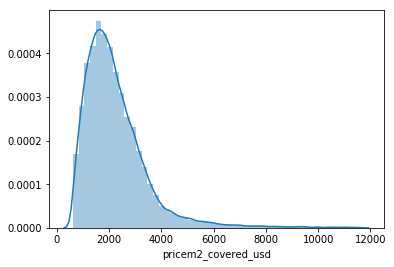

In [209]:
print("Me fijo si nuestro target esta sesgado",y.skew())
print("Distribucion de y:\n")
sns.distplot(y)

Se puede ver que no sigue una distribucion normal<br>
Al aplicar logaritmo nuestro target se distribuye aproximadamente normal.

Me fijo si nuestro target esta sesgado 0.21298696449485832
Distribucion de y_log:



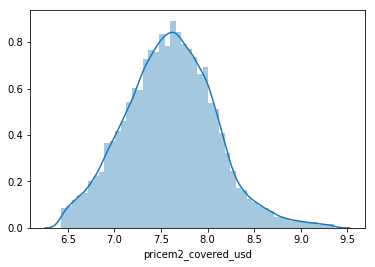

In [210]:
print("Me fijo si nuestro target esta sesgado",y_log.skew())
print("Distribucion de y_log:\n")
sns.distplot(y_log)

## Empezamos con el modelo
se crea una función para ver diferentes modelos

In [211]:
# Importamos la librerias que usamos 
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score ,accuracy_score

Se crea una funcion que recibe como primer parametro los features, como segundo el target. Como parametros opcionales tenemos los alpha, si es un modelo normalizado, el tipo de modelo y las particiones para el cross validation

In [212]:
def modelos(X, y, alpha=[0,1,10],normalizado = False, tipo= "Linear", folds=5):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    if tipo == "Linear":
        cross_val = cross_val_score(estimator = linear_model.LinearRegression(),X = X_train,y = y_train, cv=folds)
        return cross_val, cross_val.mean()
    elif tipo == "Lasso":
        modelo =  linear_model.LassoCV(alphas = np.linspace(alpha[0],alpha[1],alpha[2]), cv=folds,normalize = normalizado,n_jobs=-1)
        modelo.fit(X_train,y_train)
        #print("Variables con beta igual a 0:",(modelo.coef_ == 0))
        #print(list(zip(X_train, modelo.coef_[modelo.coef_ == 0])))
        return print("Score train:",modelo.score(X_train,y_train),"\nAlpha:",modelo.alpha_,"\nScore test:",modelo.score(X_test,y_test))
    else: 
        modelo = linear_model.RidgeCV(np.linspace(alpha[0],alpha[1],alpha[2]), cv=folds,normalize = normalizado)
        modelo.fit(X_train,y_train)
        return print("Score train:",modelo.score(X_train,y_train),"\nAlpha:",modelo.alpha_,"\nScore test:",modelo.score(X_test,y_test))

Empezamos con un modelo lineal simple con minimos cuadrados ordinarios.<br>Hacemos una para las features con barrios y otra para la que no contienen los barrios

In [213]:
# Primero el modelo sin barrios 
modelos(X_train_prov,y_train_prov,normalizado=True)

(array([-1.50952356e+14, -8.63127403e+16, -4.08589841e+12, -1.15430071e+18,
        -2.64609205e+18]),
 -7.77372108090129e+17)

In [214]:
# Ahora agregamos los barrios a las features
modelos(X_train,y_train,normalizado=True)

(array([-1.56232308e+19, -1.61127936e+19, -2.33074151e+20, -2.05876604e+17,
        -6.36668833e+18]),
 -5.427654806343017e+19)

Se aplica la funcion para regresión de tipo **Lasso**

In [215]:
modelos(X_train,y_train,alpha=[1,100,50],tipo="Lasso",normalizado=True)

Score train: 0.0 
Alpha: 100.0 
Score test: -4.070851303228373e-05


In [216]:
#modelos(X,y_log,alpha=[10,100,10],tipo="Lasso",normalizado=True)

Se aplica la funcion para regresión de tipo **Rigde**

In [217]:
modelos(X_train,y_train,alpha=[0.001,1,5],tipo="Ridge",normalizado=True)

Score train: 0.41428525844599284 
Alpha: 0.5005 
Score test: 0.26392268881334735


In [218]:
modelos(X_train_prov,y_train_prov,alpha=[0.0055,0.05,10],tipo="Ridge",normalizado=True)

Score train: 0.9104408647477463 
Alpha: 0.010444444444444444 
Score test: 0.898285553707533


## Compruebo si se cumplen los supuestos de gauss markov 

In [219]:
def linearity_test(model, y):
    '''
    funcion para visualizar e identificar supuestos de linealidad sobre la regression lineal
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observados vs. Valores Predichos', fontsize=16)
    ax[0].set(xlabel='Predichos', ylabel='Observados')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residos vs. Valores Predichos', fontsize=16)
    ax[1].set(xlabel='Predichos', ylabel='Residuos')

In [220]:
X_c = sm.add_constant(X_train)
X_c_test = sm.add_constant(X_test)
model_st = sm.regression.linear_model.OLS(y_train,X_c).fit()
model_st.summary()
model_amb = sm.regression.linear_model.OLS(y_train_m,X_train_m).fit()
model_amb.summary()
pred_m  =model_amb.predict(X_test_m)
r2_score(y_test_m,pred_m)

C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Manu\anaconda3\envs\dhdsblend\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


NameError: name 'y_train_m' is not defined

In [ ]:
rlm_model = sm.RLM(y_train, X_c, M=sm.robust.norms.HuberT()).fit()
rlm_model.summary()

In [ ]:
predicciones_robustas = rlm_model.predict(X_c_test)
r2_score(y_test,predicciones_robustas)

In [ ]:
model_st.resid.mean()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_prov.columns).T

In [ ]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')


In [ ]:
homoscedasticity_test(model_st)

In [ ]:
from scipy import stats

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot')

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')

In [ ]:
normality_of_residuals_test(model_st)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
# model.score(X_train,y_train),model.score(X_test,y_test)
print("Error cuadratico medio",mean_squared_error(y_test,pred))
print("Error absoluto medio",mean_absolute_error(y_test,pred))
print("R2",r2_score(y_test,pred))

In [ ]:
model.coef_[model.coef_ == 0]

<a id="matriz"></a>
## Matriz de correlación.
Se procede a realizar la matriz de correlación de las principales variables numericas que afectan al precio. Con esto logramos ver como estas variables se relacionan entre si, esto nos va ayudar a tener un punto de partida al momento de generar un modelo para predecir el precio.

In [ ]:
data['ambientes'] = data.ambientes.astype(float)

In [ ]:
correlacion = data[['price_dolar','surface_total_in_m2',
       'surface_covered_in_m2','expenses','ambientes','pileta', 'pricem2_covered_usd', 'pricem2_total_usd']]
corr = correlacion.corr()
corr.style.background_gradient(cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

En esta matriz de correlación a medida que los colores se vuelven mas rojos la correlación de hace cercana a 1, esto quiere decir que ambas variables se mueven juntas en el mismo sentido.<p>
Si la correlación es igual a 1 es una relacion lineal perfecta. Esto se da en nuestra matriz cuando se ve la correlacion entre las mismas variables, esto no aporta ninguna información util.<p>
Si la correlacion es igual a 0, quiere decir que no hay relacion entre estas variables.<p>
Si la correlacion es negativa quiere decir que las variables se mueven en sentido contrario.<p> 
Las principales variables que se relacionan positivamente con **price_dolar** son la **surface_total_in_m2**,**surface_covered_in_m2** y **pricem2_total_usd**

<a id="graficos"></a>
## Graficando los Datos

### Variables numericas
<a id="numericas"></a>

#### Porcentaje de nulos
Se realizo un grafico de barras para ver cuantos nulos habia antes y cuantos hay ahora. 

In [ ]:
pct_nulos_ahora= data.isnull().sum()/data.shape[0]
pct_nulos

In [ ]:
pct_nulos_ahora["floor_antes"] = pct_nulos["floor"]
pct_nulos_ahora["price_usd_per_m2_antes"] = pct_nulos["price_usd_per_m2"]
pct_nulos_ahora["floor_antes"] = pct_nulos["floor"]
pct_nulos_ahora["latlon_antes"] = pct_nulos["lat-lon"]
nulos_graf = pd.DataFrame(pct_nulos_ahora[["price_aprox_usd","price_dolar","rooms","ambientes","floor_antes","floor","price_usd_per_m2_antes","pricem2_total_usd","latlon_antes","lat-lon"]]*100,columns=["Nulos"])
nulos_graf["variables"] = ["price_dolar","price_dolar","rooms","rooms","floor","floor","price_usd_per_m2","price_usd_per_m2","lat-lon","lat-lon"]
nulos_graf["cuando"] = ["Antes","Despues","Antes","Despues","Antes","Despues","Antes","Despues","Antes","Despues"]
nulos_graf

Resultado de la limpieza de los valores nulos:

In [ ]:
sns.set(style="whitegrid")
grafico_nulos = sns.barplot(x="variables", y="Nulos", hue="cuando", data= nulos_graf)
grafico_nulos

En las columnas que mas se logro bajar los nulos fue en Rooms y Floor.
En las demas columns se logro bajar mas de 2% de los nulos en total.

#### Pairplot para ver la relacion entre las variables numericas que pueden afectar al precio
Se le aplica logaritmo a la columna **price_dolar** para acortar la dispersión entre los datos 

In [ ]:
pairplot = data[['price_dolar','surface_total_in_m2','surface_covered_in_m2','ambientes']].copy()
pairplot.dropna(axis=0,how="all",subset=["price_dolar"],inplace=True)
pairplot.drop(pairplot[pairplot.price_dolar <= 0].index,inplace=True)
pairplot["price_dolar"] = np.log(pairplot["price_dolar"])

In [ ]:
pairplot.describe()

Se procede a eliminar los outliers para que no ensucien el grafico y poder ver bien la distribución de los mismos.

In [ ]:
def lim_inf(serie):
    q1 = serie.quantile(q=0.25)
    q3 = serie.quantile(q=0.75)
    lim_inf = q1 - (q3-q1) * 1.5
    return lim_inf
def lim_sup(serie):
    q1 = serie.quantile(q=0.25)
    q3 = serie.quantile(q=0.75)
    lim_sup= q3 + (q3-q1)*1.5
    return lim_sup
pairplot1 = pairplot[(pairplot.ambientes > lim_inf(pairplot.ambientes)) & (pairplot.ambientes <= lim_sup(pairplot.ambientes))]
pairplot2 = pairplot1[(pairplot1.surface_total_in_m2 >= lim_inf(pairplot1.surface_total_in_m2)) & (pairplot1.surface_total_in_m2 <= lim_sup(pairplot1.surface_total_in_m2))]
pairplot3 = pairplot2[(pairplot2.surface_covered_in_m2 >= lim_inf(pairplot2.surface_covered_in_m2)) & (pairplot2.surface_covered_in_m2 <= lim_sup(pairplot2.surface_covered_in_m2))]

In [ ]:
grafico_pair_plot = sns.pairplot(data=pairplot3)
grafico_pair_plot

No se logra ver una correlacion fuerte de **price_dolar** con alguna de las variables. Eso tambien se vio en la matriz de correlación.<p>
Ademas en las diagonales se puede ver la distribución de cada variables con una bar plot.

### Variables categoricas
<a id="categoricas"></a>

#### Grafico de Torta para state_name
Se realizo un grafico de torta para ver como estab distribuidas las propiedades en los diferentes valores de **state_name**

In [ ]:
state_name_count = data.state_name.value_counts()
resto = state_name_count[8:].sum()
state_name_count.drop(index=state_name_count[8:].index,inplace=True)
state_name_count["Resto"] = resto
state_name_count

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(x= state_name_count,labels=state_name_count.index,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

Se puede apreciar que gran parte de las propiedades se encuentra en Capital Federal, Bs.As. G.B.A. Zona Norte y Bs.As. G.B.A. Zona Sur. Mas de un 50% de los datos se encuentra entre estas 3 ubicaciones 

#### Grafico de Torta para property_type
Se hizo para saber el porcentaje de cada propiedad que hay en el data_original set

In [ ]:
tipo_propiedad = data[["price_dolar","property_type"]]
torta = tipo_propiedad.property_type.value_counts()
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(x= torta,explode=(0.05,0,0,0),labels=torta.index,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

Se puede ver que un 57% de los datos son referidos a departamentes, por lo que la columnas floor que completamos puede ayudar a determinar el precio de este tipo de propiedad. 

#### Violin plot para property_type y price_dolar
Se realizo un violin plot para ver la distribucion del precio segun el tipo de vivienda. Ademas se agrega dentro del mismo un box plot<p>
Ya que el precio es una variable muy dispersa se procede a graficar el logaritmo del precio en dolares de la propiedad. Con esto logramos achicar la dispersión de los datos y ver mas claramente la distribución de los mismos. 

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
for tipo in tipo_propiedad.property_type.unique():
    fig.add_trace(go.Violin(x=tipo_propiedad["property_type"][tipo_propiedad.property_type == tipo],\
                            y=np.log(tipo_propiedad["price_dolar"][tipo_propiedad.property_type == tipo]),\
                            name = tipo,\
                            box_visible=True
                           ))
fig.show()

A partir de el violin plot se puede ver la distribución de los datos.<br>
<p>Se puede ver que <b>PH , apartment y House</b> tienen muchos outliers, esto se logra ver con el box plot. Se puede concluir que cuentan con bastante dispersión en sus datos.</p>
En cambio, con <b>store</b> se puede ver que no contiene muchos outliers, ademas las datos parecen seguir mas una distribución normal y estan mas centrados.